In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
import seaborn as sns

from math import ceil
import os
from datetime import date, datetime
import warnings
warnings.filterwarnings('ignore')
import statistics
 
import seaborn as sns
from imageio import imwrite

#from scipy.misc import imsave
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
%matplotlib inline


from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
sns.set()
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier


### ploty
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from PIL import Image, ImageChops
from IPython.display import YouTubeVideo
#######################################
from os.path import join

### SOMPY

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
from sklearn.metrics import calinski_harabasz_score


 ### Normalize data


In [76]:
df = pd.read_csv("Outliers_Removed_notstd_unscaled1.csv")

df.set_index("CONTROLN", inplace= True) ### set index

df

,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,LONGEVITY,AGE,...,MAXRAMNT,AVGGIFT,PROP_RESP_CARDPROM,HHAGE3,HVP4,IC5,EC4,AC3,HV2,MARR3
CONTROLN,,,,,,,,,,,,,,,,,,,,,
4,12,0,0,0,0,0,0,0,132,39.0,...,50.0,14.928571,0.128205,20,63,14337,21,9,937,19
8,0,0,36,31,30,3,3,8,144,49.0,...,15.0,7.600000,0.272727,22,4,6596,34,6,488,12
17,0,0,0,0,0,0,0,0,144,77.0,...,26.0,20.571429,0.136364,21,21,10460,31,11,582,5
26,4,0,28,25,41,9,3,4,144,69.0,...,17.0,12.250000,0.125000,25,99,34637,13,18,3513,5
32,1,0,31,23,44,25,4,0,156,87.0,...,15.0,8.611111,0.228571,15,99,73300,3,15,5214,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191760,0,0,0,16,73,11,0,9,156,85.0,...,27.0,14.384615,0.172414,40,99,50146,17,19,3801,6
191762,0,0,34,35,28,8,1,0,120,62.0,...,25.0,16.000000,0.285714,22,43,14563,40,11,746,7
191768,240,0,42,19,43,3,0,2,144,64.0,...,25.0,15.833333,0.222222,23,16,13047,38,19,691,6


In [77]:
### Normalizing 

# Get column names first
names = df.columns

# Create the Scaler object

scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object

scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,index=df.index, columns=names)
  
#Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df, index=df.index,columns=names) 

In [78]:
df=normalized_df.copy()

In [79]:
### check V

df

,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,LONGEVITY,AGE,...,MAXRAMNT,AVGGIFT,PROP_RESP_CARDPROM,HHAGE3,HVP4,IC5,EC4,AC3,HV2,MARR3
CONTROLN,,,,,,,,,,,,,,,,,,,,,
4,0.125836,-0.027362,-0.362098,-0.266910,-0.248626,-0.210544,-0.119461,-0.100319,0.049450,-0.163172,...,0.605323,0.121060,-0.125535,-0.024122,0.046837,-0.018236,-0.105220,-0.076029,-0.023496,0.316961
8,-0.111439,-0.063093,0.146394,0.021791,-0.047528,-0.273944,-0.096340,0.358969,0.209373,-0.164712,...,-0.091273,-0.240454,0.076195,-0.008167,-0.386097,-0.335012,0.148495,-0.361583,-0.205269,0.288736
17,-0.059001,-0.033404,-0.442060,-0.325851,-0.303530,-0.257039,-0.145841,-0.122472,0.110851,0.226394,...,0.199120,0.359616,-0.142328,-0.016886,-0.129041,-0.099947,0.030833,-0.027073,-0.091931,-0.081216
26,0.015165,-0.042662,-0.048471,-0.068665,0.098218,0.100850,-0.065143,0.043156,0.141574,0.174707,...,-0.004258,0.060340,-0.201216,0.042610,0.276884,0.491049,-0.326808,0.259311,0.549499,-0.103725
32,-0.024342,-0.019697,0.003152,-0.044538,0.061762,0.398792,-0.011436,-0.072217,0.095132,0.199539,...,-0.028495,-0.052687,-0.011091,-0.054403,0.127838,0.683524,-0.244815,0.061572,0.432401,-0.067609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191760,-0.045662,-0.025852,-0.342124,-0.117417,0.289317,0.118901,-0.112871,0.177323,0.124860,0.244557,...,0.171515,0.098579,-0.072777,0.171657,0.167786,0.538068,-0.148728,0.182579,0.372696,-0.036975
191762,-0.123779,-0.070079,0.102048,0.115535,-0.091724,0.087338,-0.239645,-0.256937,0.020747,0.122507,...,0.370546,0.394438,0.121130,-0.009071,-0.066078,-0.037207,0.365445,-0.056796,-0.131567,-0.030073
191768,0.988639,-0.007875,0.038688,-0.028070,0.022506,-0.034193,-0.034383,-0.010454,0.026134,0.019048,...,0.041640,0.042850,-0.006439,0.001942,-0.035649,-0.011342,0.033556,0.055617,-0.017095,-0.011263


### Our Final Features

In [6]:
###"LONGEVITY","RAMNTALL","NGIFTALL","PROP_RESP_CARDPROM","HVP4","HV2","EC4"]]
'''
- 'HV2'      - Average Home Value in hundreds
- 'HVP4'     - Percent Home Value >= $75,000
- 'EC4'      - Percent Adults 25+ Completed High School or Equivalency'''

"\n\n- 'HV2'      - Average Home Value in hundreds\n- 'HVP4'     - Percent Home Value >= $75,000\n\n- 'EC4'      - Percent Adults 25+ Completed High School or EquivalencyX"

In [80]:
df=df[["LONGEVITY","RAMNTALL","NGIFTALL","PROP_RESP_CARDPROM","HVP4","IC5","EC4"]]

In [81]:
df

,LONGEVITY,RAMNTALL,NGIFTALL,PROP_RESP_CARDPROM,HVP4,IC5,EC4
CONTROLN,,,,,,,
4,0.049450,0.302534,0.106323,-0.125535,0.046837,-0.018236,-0.105220
8,0.209373,-0.073057,0.041869,0.076195,-0.386097,-0.335012,0.148495
17,0.110851,0.169933,-0.058559,-0.142328,-0.129041,-0.099947,0.030833
26,0.141574,0.228785,0.097044,-0.201216,0.276884,0.491049,-0.326808
32,0.095132,0.120102,0.140008,-0.011091,0.127838,0.683524,-0.244815
...,...,...,...,...,...,...,...
191760,0.124860,0.233611,0.079633,-0.072777,0.167786,0.538068,-0.148728
191762,0.020747,0.562461,0.102958,0.121130,-0.066078,-0.037207,0.365445
191768,0.026134,0.073333,0.017914,-0.006439,-0.035649,-0.011342,0.033556


## SOM
##### The SOM training consists in 2 phases: the rough and the finetune one.
- The parameters that can be configured in the training step are:
    - The size of each individual grid
    - The rough and finetune iterations
    - The rough and finetune initial and final radiuses
    - The initialization mechanism (random/pca)

# Step1
- Turn our data into SOM
- We used 100x100 Matrix

In [9]:
sm = sompy.SOMFactory().build(
    df.values, 
    mapsize=(100, 100), 
    initialization='random', 
    component_names=df.columns,
    training='batch',
    lattice='hexa')
sm.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.005000 seconds
 Rough training...
 radius_ini: 34.000000 , radius_final: 5.666667, trainlen: 100

 epoch: 1 ---> elapsed time:  28.188000, quantization error: 1.207214

 epoch: 2 ---> elapsed time:  28.127000, quantization error: 2.547708

 epoch: 3 ---> elapsed time:  20.980000, quantization error: 2.526937

 epoch: 4 ---> elapsed time:  20.621000, quantization error: 2.518665

 epoch: 5 ---> elapsed time:  20.837000, quantization error: 2.516172

 epoch: 6 ---> elapsed time:  20.712000, quantization error: 2.514835

 epoch: 7 ---> elapsed time:  20.986000, quantization error: 2.513913

 epoch: 8 ---> elapsed time:  23.685000, quantization error: 2.513166

 epoch: 9 ---> elapsed time:  24.134000, quantization error: 2.512476

 epoch: 10 ---> elapsed time:  20.733000, quantization error: 2.511784

 epoch: 11 ---> elapsed time:  20.807000, quantization error: 2.511081

 epoch: 12 ---> elapsed time:  20.948000, quantization error: 2.510362

 ep

 epoch: 12 ---> elapsed time:  20.405000, quantization error: 1.986103

 epoch: 13 ---> elapsed time:  20.761000, quantization error: 1.978094

 epoch: 14 ---> elapsed time:  20.494000, quantization error: 1.969950

 epoch: 15 ---> elapsed time:  20.501000, quantization error: 1.961699

 epoch: 16 ---> elapsed time:  20.614000, quantization error: 1.953277

 epoch: 17 ---> elapsed time:  22.127000, quantization error: 1.944711

 epoch: 18 ---> elapsed time:  20.368000, quantization error: 1.936032

 epoch: 19 ---> elapsed time:  20.730000, quantization error: 1.927263

 epoch: 20 ---> elapsed time:  21.714000, quantization error: 1.918377

 epoch: 21 ---> elapsed time:  23.710000, quantization error: 1.909381

 epoch: 22 ---> elapsed time:  22.312000, quantization error: 1.900209

 epoch: 23 ---> elapsed time:  25.469000, quantization error: 1.890925

 epoch: 24 ---> elapsed time:  22.010000, quantization error: 1.881503

 epoch: 25 ---> elapsed time:  20.343000, quantization error: 1.

###### The quantization error: average distance between each data vector and its BMU. (Best match Unit)

#### Components Plates

The components map shows the values of the variables for each prototype and allows us to extract conclusions consisting of non-linear patterns between variables. 

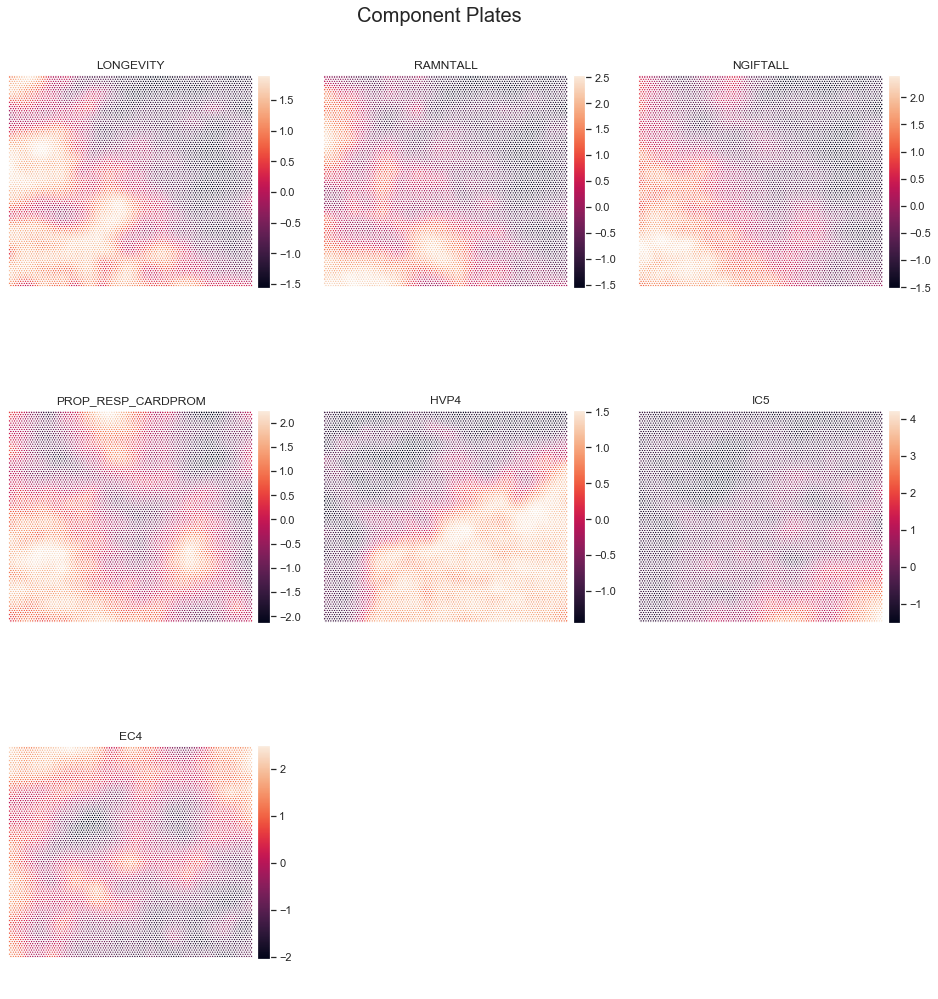

In [96]:
sns.set()
view2D = View2D(100,100,"", text_size=2.8)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.95)
plt.suptitle("Component Plates", fontsize=20)
plt.show()

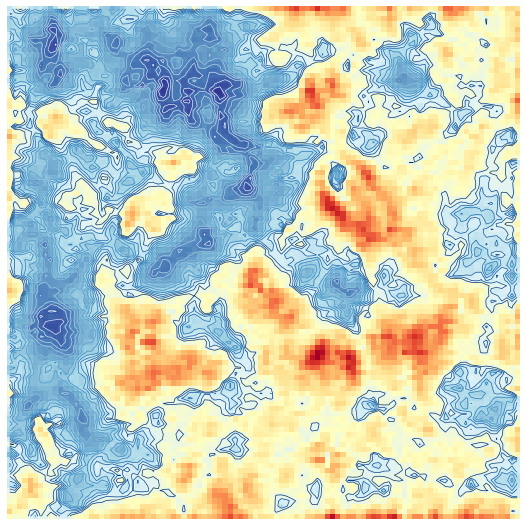

In [99]:
u = sompy.umatrix.UMatrixView(1000, 1000, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm, 
    distance2=1, 
    row_normalized=False, 
    show_data=False, 
    contooor=True )

### Step 2

### SOM / K-means

#### Indicative cluster number for k-mean with scaled and normalized df

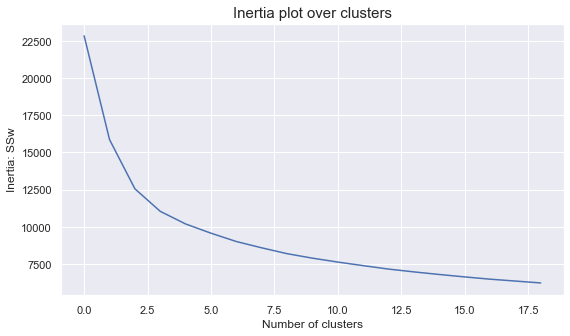

In [12]:
range_clusters = range(1, 20)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution


plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

### k-mean

In [69]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=20, random_state=15)
node_clus_kmean = sm.cluster(kmeans)


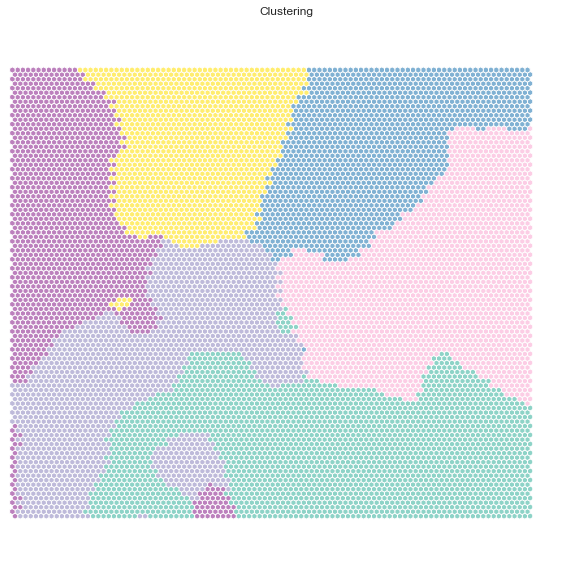

In [70]:
hits  = HitMapView(10, 10,"Clustering",text_size=100, cmap=plt.cm.jet)
hits.show(sm, anotate=False, onlyzeros=False, labelsize=7, cmap="Set3")

plt.show()

In [71]:
# check the nodes and clusters
nodes = sm.get_node_vectors()

df_nodes = pd.DataFrame(nodes, columns=df.columns)
df_nodes['label'] = node_clus_kmean


In [72]:
df_nodes

,LONGEVITY,RAMNTALL,NGIFTALL,PROP_RESP_CARDPROM,HVP4,IC5,EC4,label
0,-0.312822,-0.290944,-0.266965,-0.006926,-0.295783,-0.155283,0.439075,0
1,-0.306502,-0.281987,-0.259450,-0.028874,-0.302461,-0.168605,0.404558,0
2,-0.291917,-0.272422,-0.250156,-0.053230,-0.316881,-0.189348,0.370026,0
3,-0.293842,-0.268604,-0.246089,-0.087146,-0.332973,-0.214528,0.342884,0
4,-0.311129,-0.284341,-0.261556,-0.122921,-0.335392,-0.219940,0.326280,0
...,...,...,...,...,...,...,...,...
9995,0.051797,0.499405,0.315013,0.187842,-0.250203,-0.153532,0.228243,4
9996,0.078091,0.521400,0.291776,0.147515,-0.241373,-0.137232,0.260338,4
9997,0.125150,0.520905,0.259834,0.125636,-0.241602,-0.132867,0.288929,4
9998,0.183909,0.517063,0.249471,0.085252,-0.239243,-0.136755,0.304128,4


In [82]:
df2=df.copy()
df2

,LONGEVITY,RAMNTALL,NGIFTALL,PROP_RESP_CARDPROM,HVP4,IC5,EC4
CONTROLN,,,,,,,
4,0.049450,0.302534,0.106323,-0.125535,0.046837,-0.018236,-0.105220
8,0.209373,-0.073057,0.041869,0.076195,-0.386097,-0.335012,0.148495
17,0.110851,0.169933,-0.058559,-0.142328,-0.129041,-0.099947,0.030833
26,0.141574,0.228785,0.097044,-0.201216,0.276884,0.491049,-0.326808
32,0.095132,0.120102,0.140008,-0.011091,0.127838,0.683524,-0.244815
...,...,...,...,...,...,...,...
191760,0.124860,0.233611,0.079633,-0.072777,0.167786,0.538068,-0.148728
191762,0.020747,0.562461,0.102958,0.121130,-0.066078,-0.037207,0.365445
191768,0.026134,0.073333,0.017914,-0.006439,-0.035649,-0.011342,0.033556


In [83]:
# final cluster solution
knn = KNeighborsClassifier(n_neighbors=5)

##### fit using SOM nodes and cluster labels
knn.fit(nodes, node_clus_kmean)

# assign cluster labels to the dataset based on the label of the closest node
df2["labels"] = knn.predict(df2)

In [84]:
# Characterizing the final clusters


df_finalK = df2.copy()

In [85]:
df_finalK

,LONGEVITY,RAMNTALL,NGIFTALL,PROP_RESP_CARDPROM,HVP4,IC5,EC4,labels
CONTROLN,,,,,,,,
4,0.049450,0.302534,0.106323,-0.125535,0.046837,-0.018236,-0.105220,2
8,0.209373,-0.073057,0.041869,0.076195,-0.386097,-0.335012,0.148495,1
17,0.110851,0.169933,-0.058559,-0.142328,-0.129041,-0.099947,0.030833,1
26,0.141574,0.228785,0.097044,-0.201216,0.276884,0.491049,-0.326808,2
32,0.095132,0.120102,0.140008,-0.011091,0.127838,0.683524,-0.244815,2
...,...,...,...,...,...,...,...,...
191760,0.124860,0.233611,0.079633,-0.072777,0.167786,0.538068,-0.148728,2
191762,0.020747,0.562461,0.102958,0.121130,-0.066078,-0.037207,0.365445,4
191768,0.026134,0.073333,0.017914,-0.006439,-0.035649,-0.011342,0.033556,1


#### Evaluation with R2 / Silhouette score / Calinski harabasz score

In [86]:
# using R^2
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df)  # get total sum of squares
ssw_labels = df_finalK.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
r2

0.5645444592603334

In [87]:
silhouette_score(df_finalK, df_finalK.labels, random_state=15)

0.5721374144321187

In [34]:

calinski_harabasz_score(df_finalK, df_finalK.labels)

265599.7266041703

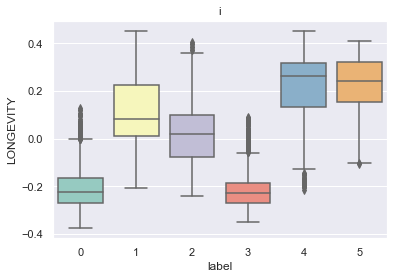

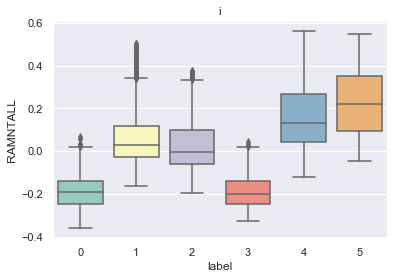

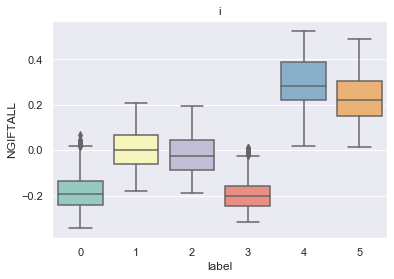

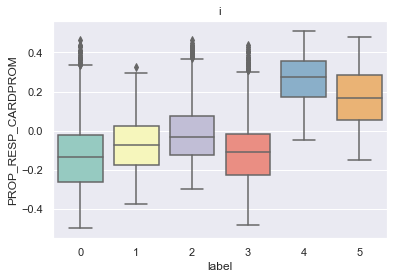

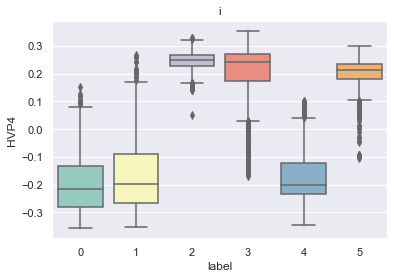

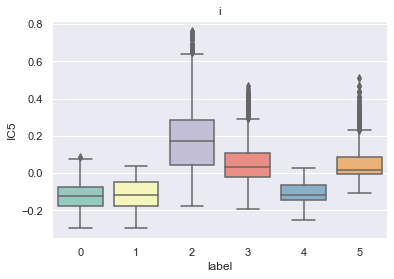

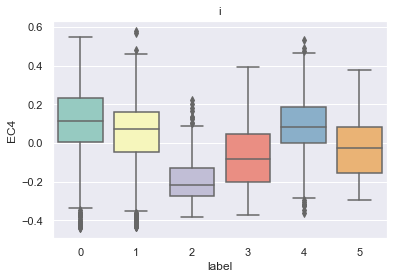

In [35]:
df_plots= df_nodes.iloc[:,:-1]


fig, axes = figsize=(20, 11)

for i in(df_plots.columns):
    sns.boxplot(x = "label", y = i, data=df_nodes, palette="Set3")
    plt.title('i')
    plt.show()

### Step 3

### SOM / Hierarchical

#### Hierarchical dendogram

In [36]:
nodes = sm.get_node_vectors() ### SOM nodes 100x100

In [37]:
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust_labels = hclust.fit_predict(nodes)

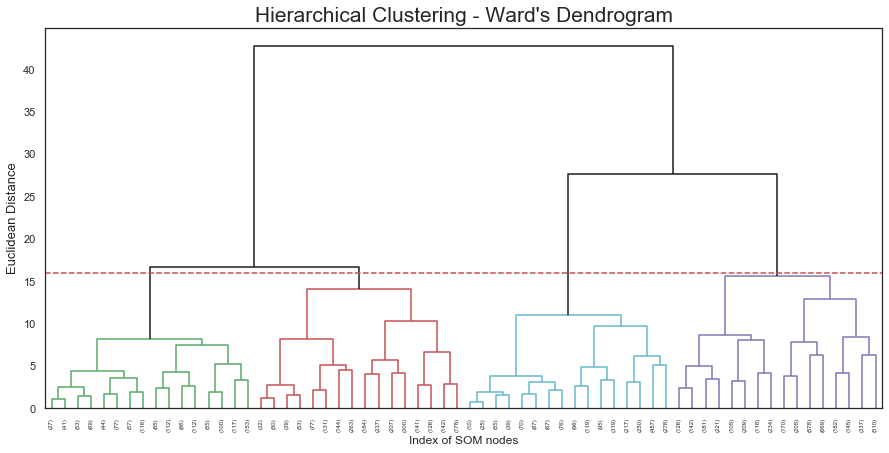

In [91]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
sns.set_style(style="white")
fig = plt.figure(figsize=(15,7))
# The Dendrogram parameters need to be tuned
y_threshold = 16
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Index of SOM nodes')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

#### The dendrogram indicates that, we can aggregate clusters into four groups

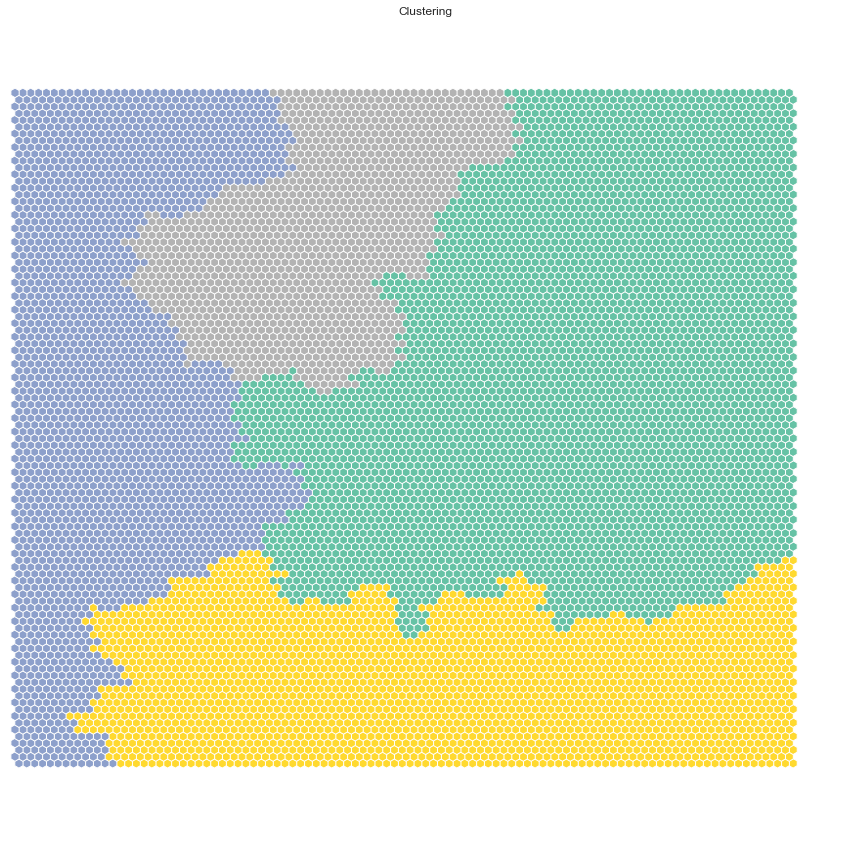

In [53]:
hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
node_clus_hier = sm.cluster(hierclust)

hits  = HitMapView(15, 15,"Clustering",text_size=10, cmap=plt.cm.jet)
hits.show(sm, anotate=False, onlyzeros=False, labelsize=7, cmap="Set2")

plt.show()

In [40]:
node_clus_hier

array([2, 2, 2, ..., 1, 1, 1])

In [41]:
df2=df.copy()

In [42]:
df2

,LONGEVITY,RAMNTALL,NGIFTALL,PROP_RESP_CARDPROM,HVP4,IC5,EC4
CONTROLN,,,,,,,
4,0.049450,0.302534,0.106323,-0.125535,0.046837,-0.018236,-0.105220
8,0.209373,-0.073057,0.041869,0.076195,-0.386097,-0.335012,0.148495
17,0.110851,0.169933,-0.058559,-0.142328,-0.129041,-0.099947,0.030833
26,0.141574,0.228785,0.097044,-0.201216,0.276884,0.491049,-0.326808
32,0.095132,0.120102,0.140008,-0.011091,0.127838,0.683524,-0.244815
...,...,...,...,...,...,...,...
191760,0.124860,0.233611,0.079633,-0.072777,0.167786,0.538068,-0.148728
191762,0.020747,0.562461,0.102958,0.121130,-0.066078,-0.037207,0.365445
191768,0.026134,0.073333,0.017914,-0.006439,-0.035649,-0.011342,0.033556


In [43]:
# check the nodes and clusters
nodes = sm.get_node_vectors()

df_nodes = pd.DataFrame(nodes, columns=df.columns)
df_nodes['label'] = node_clus_hier



In [44]:
# final cluster solution
knn = KNeighborsClassifier(n_neighbors=5)

##### fit using SOM nodes and cluster labels
knn.fit(nodes, node_clus_hier)

# assign cluster labels to the dataset based on the label of the closest node
df2["labels"] = knn.predict(df2)

In [45]:
df_final=df2.copy()

#### Evaluation with R2 / Silhouette score / calinski harabasz score

In [46]:
#  R^2

def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df)  # get total sum of squares

ssw_labels = df_final.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels

ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB

r2 = ssb / sst

r2

0.45646154826397756

In [47]:
#### Silhouette

silhouette_score(df_final,df_final.labels, random_state=15)

0.5741800829555759

In [48]:
### Calinski

calinski_harabasz_score(df_final, df_final.labels)

142888.6464504668

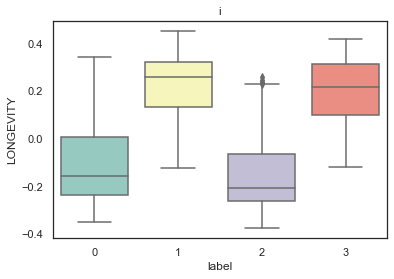

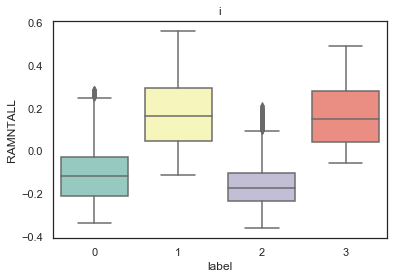

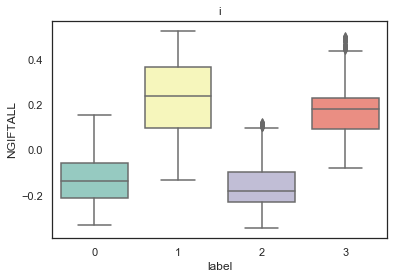

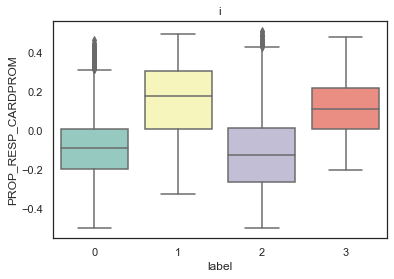

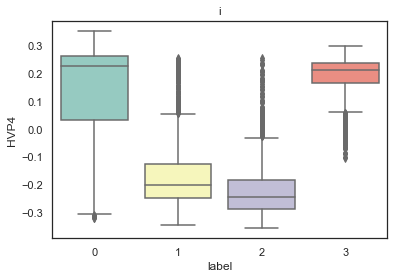

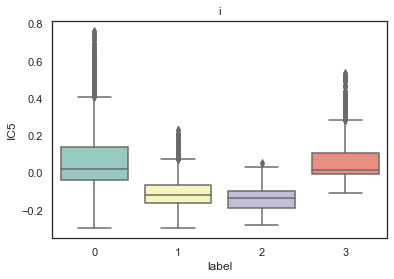

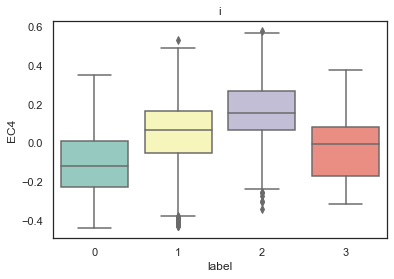

In [49]:
df_plots= df_nodes.iloc[:,:-1]


fig, axes = figsize=(20, 11)

for i in(df_plots.columns):
    sns.boxplot(x = "label", y = i, data=df_nodes, palette="Set3")
    plt.title('i')
    plt.show()

In [50]:
df_final

,LONGEVITY,RAMNTALL,NGIFTALL,PROP_RESP_CARDPROM,HVP4,IC5,EC4,labels
CONTROLN,,,,,,,,
4,0.049450,0.302534,0.106323,-0.125535,0.046837,-0.018236,-0.105220,3
8,0.209373,-0.073057,0.041869,0.076195,-0.386097,-0.335012,0.148495,2
17,0.110851,0.169933,-0.058559,-0.142328,-0.129041,-0.099947,0.030833,0
26,0.141574,0.228785,0.097044,-0.201216,0.276884,0.491049,-0.326808,0
32,0.095132,0.120102,0.140008,-0.011091,0.127838,0.683524,-0.244815,0
...,...,...,...,...,...,...,...,...
191760,0.124860,0.233611,0.079633,-0.072777,0.167786,0.538068,-0.148728,0
191762,0.020747,0.562461,0.102958,0.121130,-0.066078,-0.037207,0.365445,1
191768,0.026134,0.073333,0.017914,-0.006439,-0.035649,-0.011342,0.033556,0


### Predict Outliers

In [55]:
df_out = pd.read_csv("outliers_notstd_unscaled1.csv")
df_out.set_index("CONTROLN", inplace= True)
df_out

,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,LONGEVITY,AGE,...,MAXRAMNT,AVGGIFT,PROP_RESP_CARDPROM,HHAGE3,HVP4,IC5,EC4,AC3,HV2,MARR3
CONTROLN,,,,,,,,,,,,,,,,,,,,,
13,1,0,22,69,5,5,1,2,144,71.0,...,25.0,9.045455,0.394737,2,97,20557,16,4,1130,1
15,0,0,17,43,12,3,1,1,132,64.0,...,20.0,14.636364,0.166667,3,97,22196,19,5,1310,2
21,3,0,0,0,0,0,0,0,132,39.0,...,10.0,5.121212,0.250000,7,99,16077,13,9,1692,2
27,5,1,19,22,17,6,3,4,132,71.0,...,20.0,14.523810,0.117647,9,98,12606,29,12,1925,4
46,2,0,41,72,9,6,10,7,180,58.0,...,100.0,52.272727,0.125000,13,48,10782,30,9,782,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191661,240,0,31,20,19,3,4,3,120,77.0,...,37.0,24.454545,0.208333,21,17,10779,45,11,571,5
191675,0,0,39,23,17,17,8,7,72,67.0,...,25.0,25.000000,0.100000,23,1,5016,37,24,352,11
191716,240,0,18,34,0,10,2,3,108,46.0,...,42.0,26.066667,0.260870,19,71,14122,18,6,833,11


In [56]:
df_out=df_out[["LONGEVITY","RAMNTALL","NGIFTALL","PROP_RESP_CARDPROM","HVP4","IC5","EC4"]]

In [57]:
df_out

,LONGEVITY,RAMNTALL,NGIFTALL,PROP_RESP_CARDPROM,HVP4,IC5,EC4
CONTROLN,,,,,,,
13,144,398.0,44,0.394737,97,20557,16
15,132,322.0,22,0.166667,97,22196,19
21,132,169.0,33,0.250000,99,16077,13
27,132,305.0,21,0.117647,98,12606,29
46,180,575.0,11,0.125000,48,10782,30
...,...,...,...,...,...,...,...
191661,120,269.0,11,0.208333,17,10779,45
191675,72,50.0,2,0.100000,1,5016,37
191716,108,391.0,15,0.260870,71,14122,18


##### Normalizing / Scalling

In [58]:
### Normalizing 

# Get column names first
names = df_out.columns

# Create the Scaler object

scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object

scaled_df = scaler.fit_transform(df_out)
scaled_df = pd.DataFrame(scaled_df,index=df_out.index, columns=names)
  
#Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df_out = pd.DataFrame(normalized_df, index=df_out.index,columns=names) 

In [59]:
df_out=normalized_df_out.copy()

In [60]:
df_out

,LONGEVITY,RAMNTALL,NGIFTALL,PROP_RESP_CARDPROM,HVP4,IC5,EC4
CONTROLN,,,,,,,
13,0.048784,0.283383,0.688883,0.034379,0.458099,0.150646,-0.457191
15,-0.094366,0.193048,0.110761,-0.491608,0.626055,0.293124,-0.471184
21,-0.078428,-0.164536,0.437249,-0.245021,0.544291,-0.027090,-0.646968
27,-0.101484,0.160885,0.078508,-0.653181,0.688789,-0.233755,0.044007
46,0.439892,0.671817,-0.243707,-0.472077,-0.064577,-0.251602,0.073716
...,...,...,...,...,...,...,...
191661,-0.213308,0.048103,-0.254385,-0.328403,-0.440848,-0.262759,0.718496
191675,-0.514028,-0.286916,-0.368237,-0.370882,-0.433501,-0.355076,0.257488
191716,-0.477537,0.423587,-0.176079,-0.308634,0.287869,-0.156713,-0.599037


In [61]:
# final cluster solution
knn = KNeighborsClassifier(n_neighbors=5)

##### fit using SOM nodes and cluster labels
knn.fit(nodes, node_clus_hier)

df_out['labels'] = knn.predict(df_out)

In [62]:
df_out.labels.value_counts()

1    3128
0    3020
2    1835
3    1413
Name: labels, dtype: int64

In [63]:
df_out

,LONGEVITY,RAMNTALL,NGIFTALL,PROP_RESP_CARDPROM,HVP4,IC5,EC4,labels
CONTROLN,,,,,,,,
13,0.048784,0.283383,0.688883,0.034379,0.458099,0.150646,-0.457191,1
15,-0.094366,0.193048,0.110761,-0.491608,0.626055,0.293124,-0.471184,0
21,-0.078428,-0.164536,0.437249,-0.245021,0.544291,-0.027090,-0.646968,0
27,-0.101484,0.160885,0.078508,-0.653181,0.688789,-0.233755,0.044007,0
46,0.439892,0.671817,-0.243707,-0.472077,-0.064577,-0.251602,0.073716,1
...,...,...,...,...,...,...,...,...
191661,-0.213308,0.048103,-0.254385,-0.328403,-0.440848,-0.262759,0.718496,2
191675,-0.514028,-0.286916,-0.368237,-0.370882,-0.433501,-0.355076,0.257488,2
191716,-0.477537,0.423587,-0.176079,-0.308634,0.287869,-0.156713,-0.599037,0


In [64]:
df_final

,LONGEVITY,RAMNTALL,NGIFTALL,PROP_RESP_CARDPROM,HVP4,IC5,EC4,labels
CONTROLN,,,,,,,,
4,0.049450,0.302534,0.106323,-0.125535,0.046837,-0.018236,-0.105220,3
8,0.209373,-0.073057,0.041869,0.076195,-0.386097,-0.335012,0.148495,2
17,0.110851,0.169933,-0.058559,-0.142328,-0.129041,-0.099947,0.030833,0
26,0.141574,0.228785,0.097044,-0.201216,0.276884,0.491049,-0.326808,0
32,0.095132,0.120102,0.140008,-0.011091,0.127838,0.683524,-0.244815,0
...,...,...,...,...,...,...,...,...
191760,0.124860,0.233611,0.079633,-0.072777,0.167786,0.538068,-0.148728,0
191762,0.020747,0.562461,0.102958,0.121130,-0.066078,-0.037207,0.365445,1
191768,0.026134,0.073333,0.017914,-0.006439,-0.035649,-0.011342,0.033556,0


### Concat df_final and df_out



In [65]:
result = pd.concat([df_final, df_out])

In [66]:
result.labels.value_counts()

0    28251
1    19317
2    17495
3     9225
Name: labels, dtype: int64

In [88]:
#  R^2

def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df)  # get total sum of squares

ssw_labels = result.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels

ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB

r2 = ssb / sst

r2

0.2023439780477818

In [89]:
#### Silhouette

silhouette_score(result,result.labels, random_state=15)

0.5445583037778514

In [100]:
### Calinski

calinski_harabasz_score(result,result.labels)

130298.90198785848

In [101]:
result

,LONGEVITY,RAMNTALL,NGIFTALL,PROP_RESP_CARDPROM,HVP4,IC5,EC4,labels
CONTROLN,,,,,,,,
4,0.049450,0.302534,0.106323,-0.125535,0.046837,-0.018236,-0.105220,3
8,0.209373,-0.073057,0.041869,0.076195,-0.386097,-0.335012,0.148495,2
17,0.110851,0.169933,-0.058559,-0.142328,-0.129041,-0.099947,0.030833,0
26,0.141574,0.228785,0.097044,-0.201216,0.276884,0.491049,-0.326808,0
32,0.095132,0.120102,0.140008,-0.011091,0.127838,0.683524,-0.244815,0
...,...,...,...,...,...,...,...,...
191661,-0.213308,0.048103,-0.254385,-0.328403,-0.440848,-0.262759,0.718496,2
191675,-0.514028,-0.286916,-0.368237,-0.370882,-0.433501,-0.355076,0.257488,2
191716,-0.477537,0.423587,-0.176079,-0.308634,0.287869,-0.156713,-0.599037,0


### Export csv

In [103]:
result.to_csv('clustering_output.csv',index="CONTROLN", sep=";")